In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import joblib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
heart = pd.read_csv("Heart_disease_statlog.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [6]:
heart.target.value_counts()

0    150
1    120
Name: target, dtype: int64

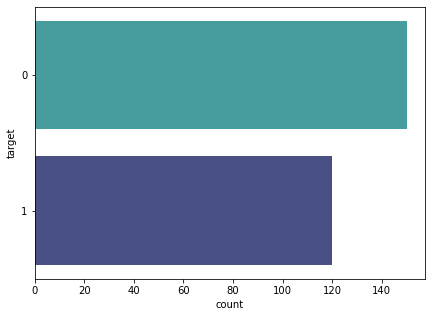

In [7]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(y="target", data=heart, palette="mako_r");

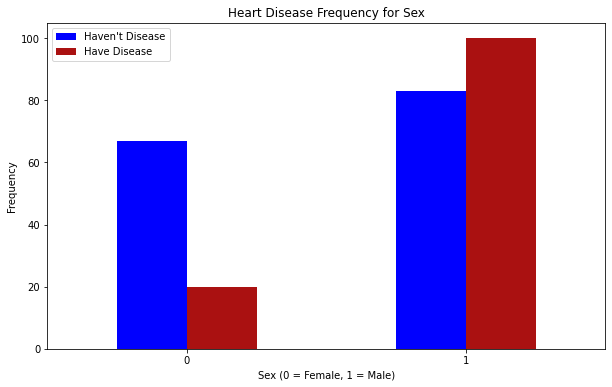

In [8]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(10,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

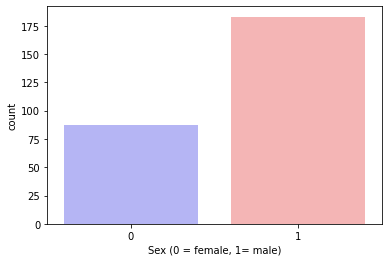

In [9]:
sns.countplot(x='sex', data=heart, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

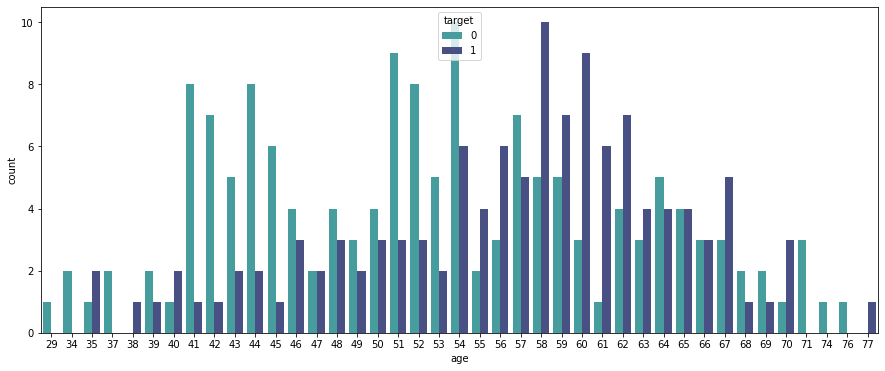

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = heart, hue = 'target',palette='mako_r')
plt.show()

In [11]:
# Variabel independen
x = heart.drop(["target"], axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1


In [12]:
# Variabel dependen
y = heart["target"]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: target, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =123)

In [15]:
print(x_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
166   50    0   3       110   254    0        2      159      0      0.0   
79    56    1   1       120   236    0        0      178      0      0.8   
5     65    1   3       120   177    0        0      140      0      0.4   
4     74    0   1       120   269    0        2      121      1      0.2   
127   52    0   2       136   196    0        2      169      0      0.1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
106   51    1   2       100   222    0        0      143      1      1.2   
83    41    1   2       130   214    0        2      168      0      2.0   
17    53    1   3       140   203    1        2      155      1      3.1   
230   61    0   3       145   307    0        2      146      1      1.0   
98    64    0   2       140   313    0        0      133      0      0.2   

     slope  ca  thal  
166      0   0     1  
79       0   0     1  
5        0   0    

In [16]:
print(y_test)

30     1
239    0
120    1
29     0
196    0
193    1
132    0
20     1
152    0
248    1
251    0
255    0
238    0
243    1
31     0
187    0
90     0
210    1
250    1
160    1
24     0
217    0
259    0
150    0
192    0
19     0
181    1
42     0
128    0
142    1
227    1
201    1
72     0
82     1
252    1
261    1
21     0
100    0
52     0
221    1
200    0
215    0
194    0
125    0
71     0
130    1
53     0
28     1
246    1
268    0
61     1
33     1
37     1
89     1
Name: target, dtype: int64


In [17]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
nbtrain = modelnb.fit(x_train, y_train)

In [18]:
nbtrain.class_count_

array([120.,  96.])

In [19]:
print(x.shape, y_train.shape, y_test.shape)

(270, 13) (216,) (54,)


In [20]:
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [21]:
y_actual = np.array(y_test)
y_actual

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [22]:
nbtrain.predict_proba(x_test)

array([[2.38739855e-01, 7.61260145e-01],
       [9.99665744e-01, 3.34256028e-04],
       [2.46900297e-05, 9.99975310e-01],
       [9.78785139e-01, 2.12148615e-02],
       [9.38433660e-01, 6.15663402e-02],
       [3.28410924e-01, 6.71589076e-01],
       [9.97114222e-01, 2.88577776e-03],
       [2.42418498e-06, 9.99997576e-01],
       [9.99507419e-01, 4.92581040e-04],
       [4.96162712e-01, 5.03837288e-01],
       [9.99822577e-01, 1.77423079e-04],
       [9.67282680e-01, 3.27173203e-02],
       [9.93928715e-01, 6.07128480e-03],
       [2.01100980e-03, 9.97988990e-01],
       [1.21754723e-01, 8.78245277e-01],
       [6.34138692e-05, 9.99936586e-01],
       [9.81394058e-01, 1.86059415e-02],
       [9.71204823e-01, 2.87951771e-02],
       [2.07858214e-02, 9.79214179e-01],
       [3.60019407e-01, 6.39980593e-01],
       [9.84064009e-01, 1.59359906e-02],
       [8.13993297e-02, 9.18600670e-01],
       [9.84540798e-01, 1.54592021e-02],
       [9.99319647e-01, 6.80353041e-04],
       [9.854601

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test, y_pred)

array([[26,  4],
       [ 3, 21]], dtype=int64)

In [25]:
y_actual = pd.Series([1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,
                      0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,1,1,1], name = "actual")
y_pred = pd.Series([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1], name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion

prediction,0,1
actual,,
0,26,4
1,3,21


<AxesSubplot:title={'center':'Naive Bayes Confusion Matrix'}>

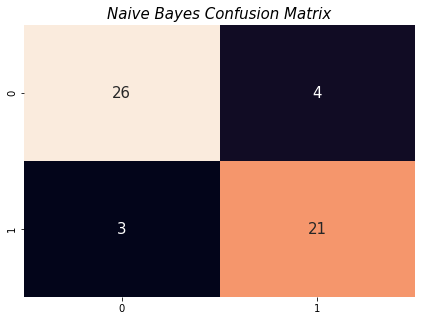

In [26]:
cm_nb=confusion_matrix(y_test,y_pred)
#Membuat Confusion Matrix
plt.figure(figsize=(7,5))
plt.title("Naive Bayes Confusion Matrix",fontsize=15, style='oblique')
sns.heatmap(cm_nb,annot=True,cmap="rocket",fmt="d",cbar=False, annot_kws={"size": 15})

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.84      0.88      0.86        24

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

# Load data (contoh menggunakan pandas)
data = pd.read_csv('Heart_disease_statlog.csv')

# Pisahkan fitur dan label
X = data.drop('target', axis=1)
y = data['target']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Inisialisasi dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)

Akurasi: 0.8703703703703703
Presisi: 0.84
Recall: 0.875


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import joblib

# Load data (contoh menggunakan pandas)
data = pd.read_csv('Heart_disease_statlog.csv')

# Pisahkan fitur dan label
X = data.drop('target', axis=1)
y = data['target']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Inisialisasi dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)

# Simpan model ke file
joblib.dump(model, 'heart_disease_model.pkl')


Akurasi: 0.8703703703703703
Presisi: 0.84
Recall: 0.875


['heart_disease_model.pkl']

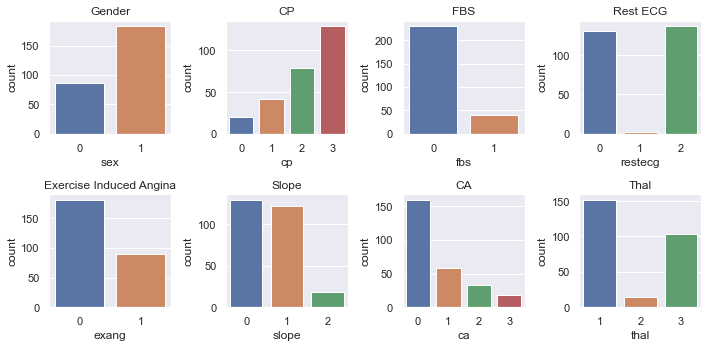

In [30]:
# Dengan asumsi 'heart' adalah DataFrame Anda
sns.set(rc={'figure.figsize': (10, 5)})
fig, axes = plt.subplots(2, 4)

sns.countplot(data=heart, x='sex', ax=axes[0, 0]).set(title='Gender')
sns.countplot(data=heart, x='cp', ax=axes[0, 1]).set(title='CP')
sns.countplot(data=heart, x='fbs', ax=axes[0, 2]).set(title='FBS')
sns.countplot(data=heart, x='restecg', ax=axes[0, 3]).set(title='Rest ECG')
sns.countplot(data=heart, x='exang', ax=axes[1, 0]).set(title='Exercise Induced Angina')
sns.countplot(data=heart, x='slope', ax=axes[1, 1]).set(title='Slope')
sns.countplot(data=heart, x='ca', ax=axes[1, 2]).set(title='CA')
sns.countplot(data=heart, x='thal', ax=axes[1, 3]).set(title='Thal')

plt.tight_layout()
plt.show()

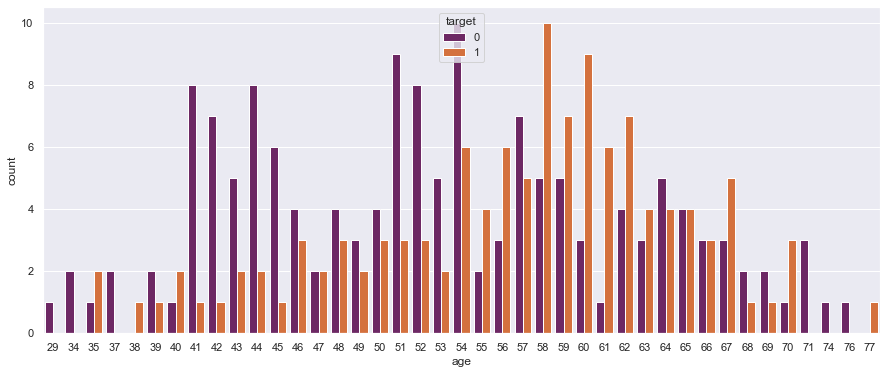

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = heart, hue = 'target',palette='inferno')
plt.show()

<AxesSubplot:>

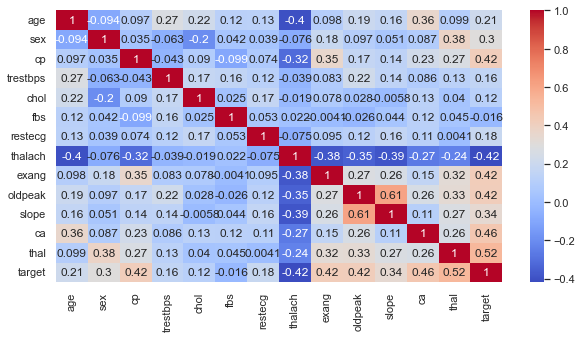

In [32]:
# buat peta panas menggunakan Seaborn
sns.heatmap(heart.corr(), cmap='coolwarm', annot=True)

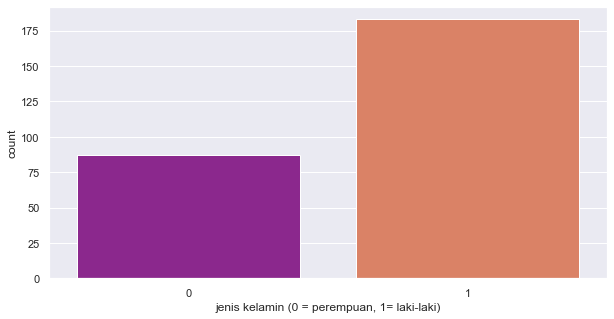

In [33]:
sns.countplot(x='sex', data=heart, palette="plasma")
plt.xlabel("jenis kelamin (0 = perempuan, 1= laki-laki)")
plt.show()

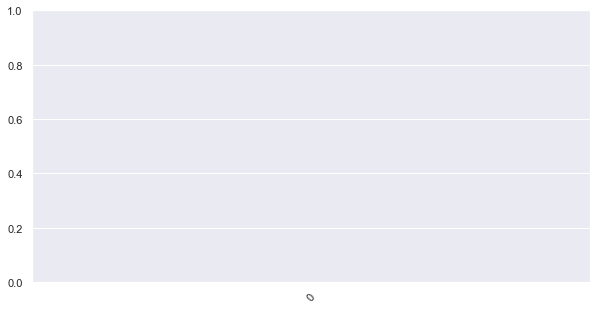

In [34]:
sns.boxplot(heart=heart[['age','trestbps','chol','thalach']])
plt.xticks(rotation=50)
plt.show()

Akurasi: 0.8703703703703703
Presisi: 0.84
Recall: 0.875
F1 Score: 0.8571428571428572


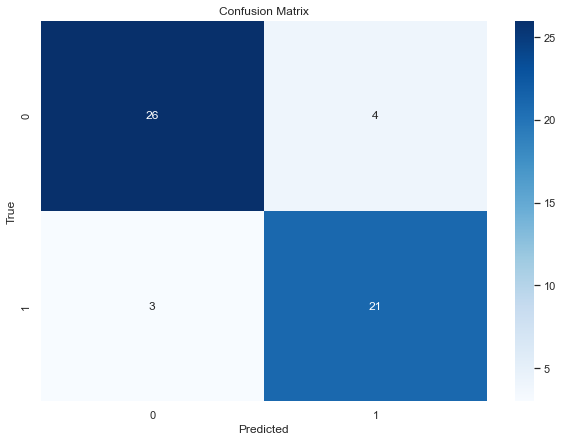

['heart_disease_model.pkl']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Membaca data
data = pd.read_csv('Heart_disease_statlog.csv')

# Memisahkan fitur dan target
X = data.drop('target', axis=1)
y = data['target']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Melatih model
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dengan seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Simpan model ke file
joblib.dump(model, 'heart_disease_model.pkl')

Akurasi: 0.8703703703703703
Presisi: 0.84
Recall: 0.875
F1 Score: 0.8571428571428572


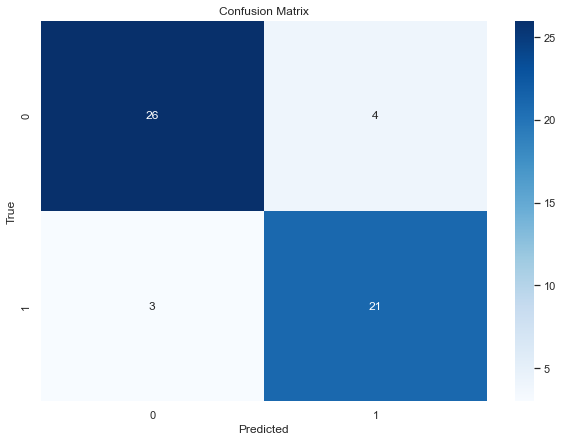


Data Latihan:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
166   50    0   3       110   254    0        2      159      0      0.0   
79    56    1   1       120   236    0        0      178      0      0.8   
5     65    1   3       120   177    0        0      140      0      0.4   
4     74    0   1       120   269    0        2      121      1      0.2   
127   52    0   2       136   196    0        2      169      0      0.1   

     slope  ca  thal  
166      0   0     1  
79       0   0     1  
5        0   0     3  
4        0   1     1  
127      1   0     1  

Label Latihan:
166    0
79     0
5      0
4      0
127    0
Name: target, dtype: int64


['heart_disease_model.pkl']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Membaca data
data = pd.read_csv('Heart_disease_statlog.csv')

# Memisahkan fitur dan target
X = data.drop('target', axis=1)
y = data['target']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Melatih model
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dengan seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan data latihan
print("\nData Latihan:")
print(X_train.head())
print("\nLabel Latihan:")
print(y_train.head())

# Simpan model ke file
joblib.dump(model, 'heart_disease_model.pkl')

Akurasi: 0.8703703703703703
Presisi: 0.84
Recall: 0.875
F1 Score: 0.8571428571428572


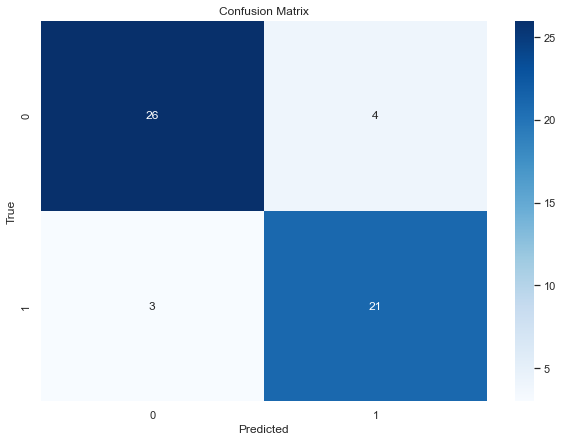


Data Uji dan Prediksi:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
30    57    1   2       128   229    0        2      150      0      0.4   
239   52    1   1       120   325    0        0      172      0      0.2   
120   49    1   2       120   188    0        0      139      0      2.0   
29    71    0   2       110   265    1        2      130      0      0.0   
196   58    0   3       100   248    0        2      122      0      1.0   

     slope  ca  thal  Actual  Predicted  
30       1   1     3       1          1  
239      0   0     1       0          0  
120      1   3     3       1          1  
29       0   1     1       0          0  
196      1   0     1       0          0  


['heart_disease_model.pkl']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Membaca data
data = pd.read_csv('Heart_disease_statlog.csv')

# Memisahkan fitur dan target
X = data.drop('target', axis=1)
y = data['target']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Melatih model
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dengan seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Membuat DataFrame untuk menampilkan data uji dan prediksi
df_test = X_test.copy()
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred

# Menampilkan DataFrame untuk data uji
print("\nData Uji dan Prediksi:")
print(df_test.head())

# Simpan model ke file
joblib.dump(model, 'heart_disease_model.pkl')